In [1]:
import pandas as pd
import numpy as np
import random
from itertools import combinations
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

The main goals and objectives of the project:
To conduct an intelligence analysis of the data and make a report on its results, in particular,
to analyze what parameters affect the student's final score on the math exam,
and based on the information obtained, make a table with only correlatively significant data.

In [2]:
math = pd.read_csv('C:/Users/HP 14s-dq1021ur/stud_math.csv')

In [3]:
display(math.head(), math.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


None

# Preparations

In [4]:
#these columns are fully correlated with each other so we can delete 'studytime, granular' column
display(math[['studytime, granular', 'studytime']].corr())
math.drop(['studytime, granular'], axis='columns', inplace=True)
#rename columns to make their names clearer
math.columns = ['school', 'sex', 'age', 'address', 'fam_size', 'parr_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'school_choice', 'guardian', 'travel_time', 'sep_study_time',
                     'failures', 'school_sup', 'fam_sup', 'paid_lessons', 'activities', 'nursery',
                         'higher_pref', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out',
                             'health', 'absences', 'score']

,"studytime, granular",studytime
"studytime, granular",1.0,-1.0
studytime,-1.0,1.0


# Functions

In [5]:
#function for column boxplots relative to "score"
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=math.loc[math.loc[:, column].isin(math.loc[:, column].value_counts().index[:20])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

#a function that finds correlation by Student's test
def get_stat_dif(column):
    cols = math.loc[:, column].value_counts().index[:15]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # consider Bonferroni correction
            print('Найдены статистически значимые различия для колонки', column)
            break
            
#func to fast "value_counts()" by number of column
def value_counts(x):
    return math.iloc[:, x].value_counts()
    
#func to fast "unique()" by number of column
def unique(x):
    return math.iloc[:, x].unique()


I tried to make "value_counts" and "unique" functions by column name, but i couldn't eventually figure out how to do this and made it by column number.
I'd be very appreciate, if you write to me how can I do this.

# Clean up the values in the table

In [6]:
#let's check unique values in every column
display(math['school'].unique(),
math['sex'].unique(),
math['age'].unique(),
math['address'].unique(),
math['fam_size'].unique(),
math['parr_status'].unique(),
math['m_edu'].unique(),
math['f_edu'].unique(),
math['m_job'].unique(),
math['f_job'].unique(),
math['school_choice'].unique(),
math['guardian'].unique(),
math['travel_time'].unique(),
math['sep_study_time'].unique(),
math['failures'].unique(),
math['school_sup'].unique(),
math['fam_sup'].unique(),
math['paid_lessons'].unique(),
math['activities'].unique(),
math['nursery'].unique(),
math['higher_pref'].unique(),
math['internet'].unique(),
math['romantic'].unique(),
math['fam_rel'].unique(),
math['free_time'].unique(),
math['go_out'].unique(),
math['health'].unique(),
math['absences'].unique(),
math['score'].unique())
#many columns have None values, but we cant's delete them, because it will delete 2|3 strings.
#now seen that these columns have problems: f_edu, fam_rel have wrong unique values,
#also absences seems to has outliers. Let's check it. Also let's chech score for ouliers.


array(['GP', 'MS'], dtype=object)

array(['F', 'M'], dtype=object)

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

array(['U', nan, 'R'], dtype=object)

array([nan, 'GT3', 'LE3'], dtype=object)

array(['A', nan, 'T'], dtype=object)

array([ 4.,  1.,  3.,  2., nan,  0.])

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

array(['mother', 'father', 'other', nan], dtype=object)

array([ 2.,  1.,  3., nan,  4.])

array([ 2.,  3.,  1., nan,  4.])

array([ 0.,  3., nan,  2.,  1.])

array(['yes', 'no', nan], dtype=object)

array(['no', 'yes', nan], dtype=object)

array(['no', nan, 'yes'], dtype=object)

array(['no', 'yes', nan], dtype=object)

array(['yes', 'no', nan], dtype=object)

array(['yes', nan, 'no'], dtype=object)

array([nan, 'yes', 'no'], dtype=object)

array(['no', nan, 'yes'], dtype=object)

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

array([ 3.,  2.,  4.,  1.,  5., nan])

array([ 4.,  3.,  2.,  1.,  5., nan])

array([ 3.,  5.,  1.,  2.,  4., nan])

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

In [7]:
display(math.f_edu.value_counts(),
       math.fam_rel.value_counts())
#in f_edu and fam_rel only 1 wrong value, so we can just null them. Sure it maybe a slip,
#but we can't say it for sure, so let's just null them.

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: f_edu, dtype: int64

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: fam_rel, dtype: int64

# Data cleansing, replacement of empty values

In [8]:
#replace the names of some values for easier understanding
math.parr_status = math.parr_status.apply(lambda x: 'together' if x == 'T' 
                       else 'apart' if x == 'A' else None)
math.fam_size = math.fam_size.apply(lambda x: 'greater_3' if x == 'GT3' 
                    else 'lesser_3' if x == 'LE3' else None) #lesser_3 is lesser or equal
math.sex = math.sex.apply(lambda x: 'male' if x == 'M'
                    else 'female' if x == 'F' else None)
math.m_edu = math.m_edu.astype(str).apply(lambda x: "haven't" if x == '0.0'
                    else 'elementary_school' if x == '1.0' else 'middle_school' if x == '2.0'
                        else 'high_school' if x == '3.0' else 'higher_edu' if x == '4.0' else None)
math.f_edu = math.f_edu.astype(str).apply(lambda x: "haven't" if x == '0.0'
                    else 'elementary_school' if x == '1.0' else 'middle_school' if x == '2.0'
                        else 'high_school' if x == '3.0' else 'higher_edu' if x == '4.0' else None)
math.travel_time = math.travel_time.astype(str).apply(lambda x: '<15m' if x == '1.0' else '15-30m' if x == '2.0'
                        else '30-60m' if x == '3.0' else '>60m' if x == '4.0' else None)
math.sep_study_time = math.sep_study_time.astype(str).apply(lambda x: '<2h' if x == '1.0' else '2-5h' if x == '2.0'
                        else '5-10h' if x == '3.0' else '>10h' if x == '4.0' else None)
math.fam_rel = math.fam_rel.astype(str).apply(lambda x: "very_bad" if x == '1.0'
                    else 'bad' if x == '2.0' else 'normal' if x == '3.0'
                        else 'good' if x == '4.0' else 'very_good' if x == '5.0' else None)
math.health = math.health.astype(str).apply(lambda x: "very_bad" if x == '1.0'
                    else 'bad' if x == '2.0' else 'normal' if x == '3.0'
                        else 'good' if x == '4.0' else 'very_good' if x == '5.0' else None)
math.free_time = math.free_time.astype(str).apply(lambda x: "very_little" if x == '1.0'
                    else 'few' if x == '2.0' else 'average' if x == '3.0'
                        else 'much' if x == '4.0' else 'very_much' if x == '5.0' else None)
math.go_out = math.go_out.astype(str).apply(lambda x: "very_little" if x == '1.0'
                    else 'few' if x == '2.0' else 'average' if x == '3.0'
                        else 'much' if x == '4.0' else 'very_much' if x == '5.0' else None)
#change nan values in higher_pref to "yes" because of "yes"-"no" proportion
math.higher_pref = math.higher_pref.astype(str).apply(lambda x: "yes" if x == 'nan' else x)
#change nan values in address to "urban" because of "urban"-"region" proportion
math.address = math.address.apply(lambda x: 'urban' if x == 'U'
                    else 'region' if x == 'R' else 'urban')

In [9]:
#change None values.
#in most cases change None value to commonly occurring, but in cases
#where the occurrence of values is similar change to random from list of those values
yes_no_list = ['yes', 'no']
school_choise_list = ['course', 'reputation', 'home', 'other']
health_list = ['very_good', 'normal']
math.fam_size = math.fam_size.apply(lambda x: 'greater_3' if x == None else x)
math.parr_status = math.parr_status.apply(lambda x: 'together' if x == None else x)
math.m_edu = math.m_edu.apply(lambda x: 'higher_edu' if x == None else x)
math.f_edu = math.f_edu.apply(lambda x: 'middle_school' if x == None else x)
math.m_job = math.m_job.astype(str).apply(lambda x: 'other' if x == 'nan' else x)
math.f_job = math.f_job.astype(str).apply(lambda x: 'other' if x == 'nan' else x)
math.school_choice = math.school_choice.astype(str).apply(lambda x: random.choice(school_choise_list) if x == 'nan' else x)
math.guardian = math.guardian.astype(str).apply(lambda x: 'mother' if x == 'nan' else x)
math.travel_time = math.travel_time.apply(lambda x: '<15m' if x == None else x)
math.sep_study_time = math.sep_study_time.apply(lambda x: '2-5h' if x == None else x)
math.failures = math.failures.astype(str).apply(lambda x: '0.0' if x == 'nan' else x)
math.school_sup = math.school_sup.astype(str).apply(lambda x: 'no' if x == 'nan' else x)
math.fam_sup = math.fam_sup.astype(str).apply(lambda x: random.choice(yes_no_list) if x == 'nan' else x)
math.paid_lessons = math.paid_lessons.astype(str).apply(lambda x: random.choice(yes_no_list) if x == 'nan' else x)
math.activities = math.activities.astype(str).apply(lambda x: random.choice(yes_no_list) if x == 'nan' else x)
math.nursery = math.nursery.astype(str).apply(lambda x: 'yes' if x == 'nan' else x)
math.internet = math.internet.astype(str).apply(lambda x: 'yes' if x == 'nan' else x)
math.romantic = math.romantic.astype(str).apply(lambda x: 'no' if x == 'nan' else x)
math.fam_rel = math.fam_rel.apply(lambda x: 'good' if x == None else x)
math.free_time = math.free_time.apply(lambda x: 'average' if x == None else x)
math.go_out = math.go_out.apply(lambda x: 'average' if x == None else x)
math.health = math.health.apply(lambda x: random.choice(health_list) if x == None else x)
math.absences = math.absences.astype(str).apply(lambda x: '0.0' if x == 'nan' else x)
math.absences = math.absences.astype(float)

I haven't figured out how to simplify data changing and cleaning using a pre-defined function.
I would be very grateful if you could tell me in the comments how this could be done.

# Analysis of numerical data

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


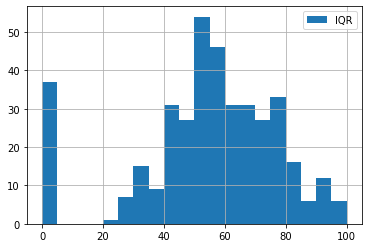

In [10]:
#let's check score for outlines
median = math.score.median()
IQR = math.score.quantile(0.75) - math.score.quantile(0.25)
perc25 = math.score.quantile(0.25)
perc75 = math.score.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
math.score.loc[math.score.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist(bins = 20, range = (0, 100), 
                                                                                             label = 'IQR')
plt.legend();
#there are no outliers

In [11]:
#let's check absences for outlines
median = math.score.median()
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
print("Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
math.absences.describe()
#the column contains outliers,
#but we will not remove them from the point of view of common sense,
#because such a number of absences could well be.
#in my opinion more data is needed because many things are not clear
#from the existing parameters and relationships, in particular,
#why a student who missed 385 lessons passed the exam 85
math[math.absences == 385]

Границы выбросов: [-12.0, 20.0].


,school,sex,age,address,fam_size,parr_status,m_edu,f_edu,m_job,f_job,...,nursery,higher_pref,internet,romantic,fam_rel,free_time,go_out,health,absences,score
222,GP,female,16,urban,greater_3,together,middle_school,high_school,services,teacher,...,yes,yes,yes,no,bad,average,very_little,normal,385.0,85.0


In [12]:
#i decided to check students with 0 score and
#compare it with absences
math_loosers = math[math.score == 0.0]
math_loosers.absences.value_counts()
#none of them missed classes


0.0    37
Name: absences, dtype: int64

In [13]:
#so i check 0 score with other columns to see some pattern
#because near 10% of students have 0
display(math_loosers['school'].value_counts(),
math_loosers['sex'].value_counts(),
math_loosers['age'].value_counts(),
math_loosers['address'].value_counts(),
math_loosers['fam_size'].value_counts(),
math_loosers['parr_status'].value_counts(),
math_loosers['m_edu'].value_counts(),
math_loosers['f_edu'].value_counts(),
math_loosers['m_job'].value_counts(),
math_loosers['f_job'].value_counts(),
math_loosers['school_choice'].value_counts(),
math_loosers['guardian'].value_counts(),
math_loosers['travel_time'].value_counts(),
math_loosers['sep_study_time'].value_counts(),
math_loosers['failures'].value_counts(),
math_loosers['school_sup'].value_counts(),
math_loosers['fam_sup'].value_counts(),
math_loosers['paid_lessons'].value_counts(),
math_loosers['activities'].value_counts(),
math_loosers['nursery'].value_counts(),
math_loosers['higher_pref'].value_counts(),
math_loosers['internet'].value_counts(),
math_loosers['romantic'].value_counts(),
math_loosers['fam_rel'].value_counts(),
math_loosers['free_time'].value_counts(),
math_loosers['go_out'].value_counts(),
math_loosers['health'].value_counts(),
math_loosers['absences'].value_counts())
#there seems to be a pattern in some columns, but if we look at these columns in common selection,
#we see that it's just a proportion.
#we can's say why these students get 0 for examination in mathematics, maybe they were caught cheating
#or they were sick, but this values in my opinion distracting from finding patterns in the data
#so we just delete them
math = math[math.score > 0.0]

GP    33
MS     4
Name: school, dtype: int64

female    22
male      15
Name: sex, dtype: int64

18    11
17     8
16     7
15     6
19     5
Name: age, dtype: int64

urban     27
region    10
Name: address, dtype: int64

greater_3    30
lesser_3      7
Name: fam_size, dtype: int64

together    35
apart        2
Name: parr_status, dtype: int64

middle_school        12
elementary_school     9
high_school           9
higher_edu            7
Name: m_edu, dtype: int64

middle_school        14
elementary_school    10
higher_edu            8
high_school           5
Name: f_edu, dtype: int64

other       14
at_home      9
services     8
teacher      4
health       2
Name: m_job, dtype: int64

other       22
services    10
teacher      3
at_home      2
Name: f_job, dtype: int64

course        17
home          12
reputation     6
other          2
Name: school_choice, dtype: int64

mother    25
father     8
other      4
Name: guardian, dtype: int64

<15m      25
15-30m     8
30-60m     4
Name: travel_time, dtype: int64

2-5h     16
<2h      13
5-10h     5
>10h      3
Name: sep_study_time, dtype: int64

0.0    19
1.0    10
3.0     4
2.0     4
Name: failures, dtype: int64

no     36
yes     1
Name: school_sup, dtype: int64

yes    22
no     15
Name: fam_sup, dtype: int64

no     29
yes     8
Name: paid_lessons, dtype: int64

yes    21
no     16
Name: activities, dtype: int64

yes    28
no      9
Name: nursery, dtype: int64

yes    31
no      6
Name: higher_pref, dtype: int64

yes    31
no      6
Name: internet, dtype: int64

yes    19
no     18
Name: romantic, dtype: int64

good         18
very_good     9
normal        6
bad           3
very_bad      1
Name: fam_rel, dtype: int64

average        21
much            8
few             4
very_much       2
very_little     2
Name: free_time, dtype: int64

average        9
few            9
very_much      8
much           7
very_little    4
Name: go_out, dtype: int64

very_good    14
normal        8
good          7
bad           6
very_bad      2
Name: health, dtype: int64

0.0    37
Name: absences, dtype: int64

In [14]:
#let's see what we have
math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352 entries, 0 to 394
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school          352 non-null    object 
 1   sex             352 non-null    object 
 2   age             352 non-null    int64  
 3   address         352 non-null    object 
 4   fam_size        352 non-null    object 
 5   parr_status     352 non-null    object 
 6   m_edu           352 non-null    object 
 7   f_edu           352 non-null    object 
 8   m_job           352 non-null    object 
 9   f_job           352 non-null    object 
 10  school_choice   352 non-null    object 
 11  guardian        352 non-null    object 
 12  travel_time     352 non-null    object 
 13  sep_study_time  352 non-null    object 
 14  failures        352 non-null    object 
 15  school_sup      352 non-null    object 
 16  fam_sup         352 non-null    object 
 17  paid_lessons    352 non-null    obj

In [15]:
#Let's split columns into two tables math_numb and math_other.
#In math_numb we will put columns with numeric values and values with " direction"
#(as in the mother and father education column: from "does not have" to " higher education").
#In math_other we put other columns.
#In math_numb lets convert string columns into float, saving the "direction".
math_numb = math.copy()
math_numb.m_edu = math_numb.m_edu.apply(lambda x: "0" if x == "haven't"
                    else '1' if x == 'elementary_school' else '2' if x == 'middle_school'
                        else '3' if x == 'high_school' else '4' if x == 'higher_edu' else x)
math_numb.m_edu = math_numb.m_edu.astype(float)
math_numb.f_edu = math_numb.f_edu.apply(lambda x: "0" if x == "haven't"
                    else '1' if x == 'elementary_school' else '2' if x == 'middle_school'
                        else '3' if x == 'high_school' else '4' if x == 'higher_edu' else x)
math_numb.f_edu = math_numb.f_edu.astype(float)
math_numb.travel_time = math_numb.travel_time.apply(lambda x: '0' if x == '<15m' else '1' if x == '15-30m'
                        else '2' if x == '30-60m' else '3' if x == '>60m' else x)
math_numb.travel_time = math_numb.travel_time.astype(float)
math_numb.sep_study_time = math_numb.sep_study_time.apply(lambda x: '0' if x == '<2h' else '1' if x == '2-5h'
                        else '2' if x == '5-10h' else '3' if x == '>10h' else x)
math_numb.sep_study_time = math_numb.sep_study_time.astype(float)
math_numb.fam_rel = math_numb.fam_rel.apply(lambda x: "0" if x == 'very_bad'
                    else '1' if x == 'bad' else '2' if x == 'normal'
                        else '3' if x == 'good' else '4' if x == 'very_good' else x)
math_numb.fam_rel = math_numb.fam_rel.astype(float)
math_numb.health = math_numb.health.apply(lambda x: "0" if x == 'very_bad'
                    else '1' if x == 'bad' else '2' if x == 'normal'
                        else '3' if x == 'good' else '4' if x == 'very_good' else x)
math_numb.health = math_numb.health.astype(float)
math_numb.free_time = math_numb.free_time.apply(lambda x: "0" if x == 'very_little'
                    else '1' if x == 'few' else '2' if x == 'average'
                        else '3' if x == 'much' else '4' if x == 'very_much' else x)
math_numb.free_time = math_numb.free_time.astype(float)
math_numb.go_out = math_numb.go_out.apply(lambda x: "0" if x == 'very_little'
                    else '1' if x == 'few' else '2' if x == 'average'
                        else '3' if x == 'much' else '4' if x == 'very_much' else x)
math_numb.go_out = math_numb.go_out.astype(float)
math_numb.drop(['school', 'sex', 'address', 'fam_size', 'parr_status', 'm_job', 'f_job', 'school_choice',
                'guardian', 'school_sup', 'fam_sup', 'paid_lessons', 'activities', 'nursery',
                         'higher_pref', 'internet', 'romantic'], axis='columns', inplace=True)

# Visualizing correlations

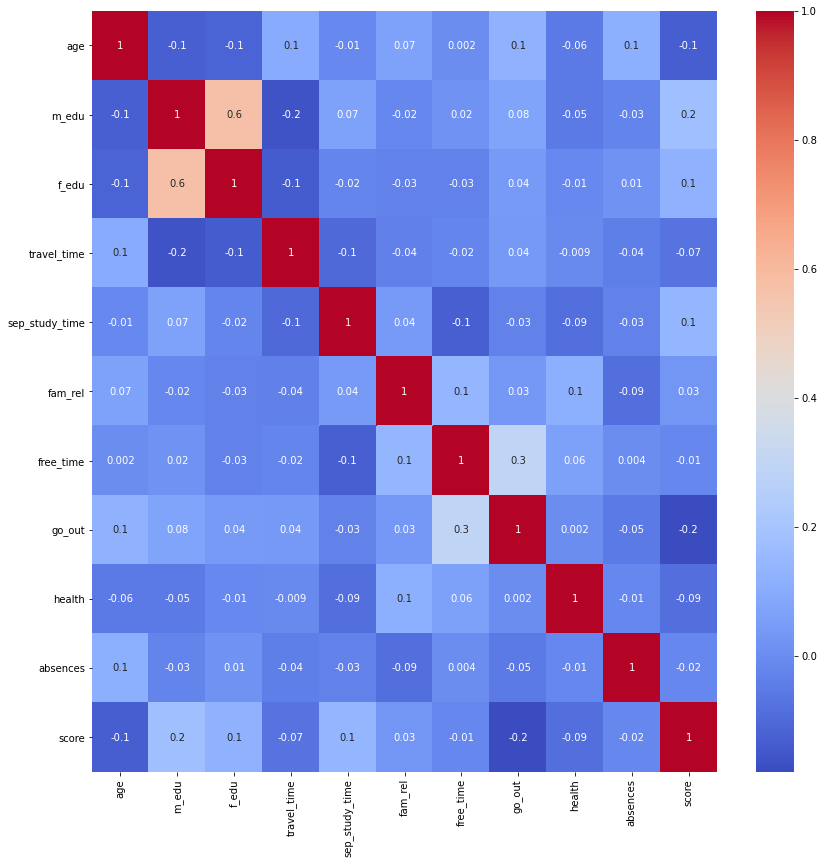

In [16]:
#let's see correlation on heatmap between the provided parameters
plt.figure(figsize=(14,14))
sns.heatmap(math_numb.corr(), cmap= 'coolwarm', annot = True, fmt='.1g')

There is quite huge direct correlation between mother and fother education, maybe this is due to the fact that parents just met in classes or that people with similar intellectual qualities are more frequent pairs. Also we can see quite a natural correlation between free_time and go_out.

In [17]:
#converting the table to a table of unique numbers corresponding to unique values in the rows.
#We convert only non-numeric columns, as well as those columns that do not have "directions",
#also let's add predicted parameter "score".
math_other = math[['school', 'sex', 'address', 'fam_size', 'parr_status', 'm_job', 'f_job', 'school_choice',
                'guardian', 'school_sup', 'fam_sup', 'paid_lessons', 'activities', 'nursery',
                         'higher_pref', 'internet', 'romantic']].apply(lambda x: x.factorize()[0])
math_other['score'] = math.score

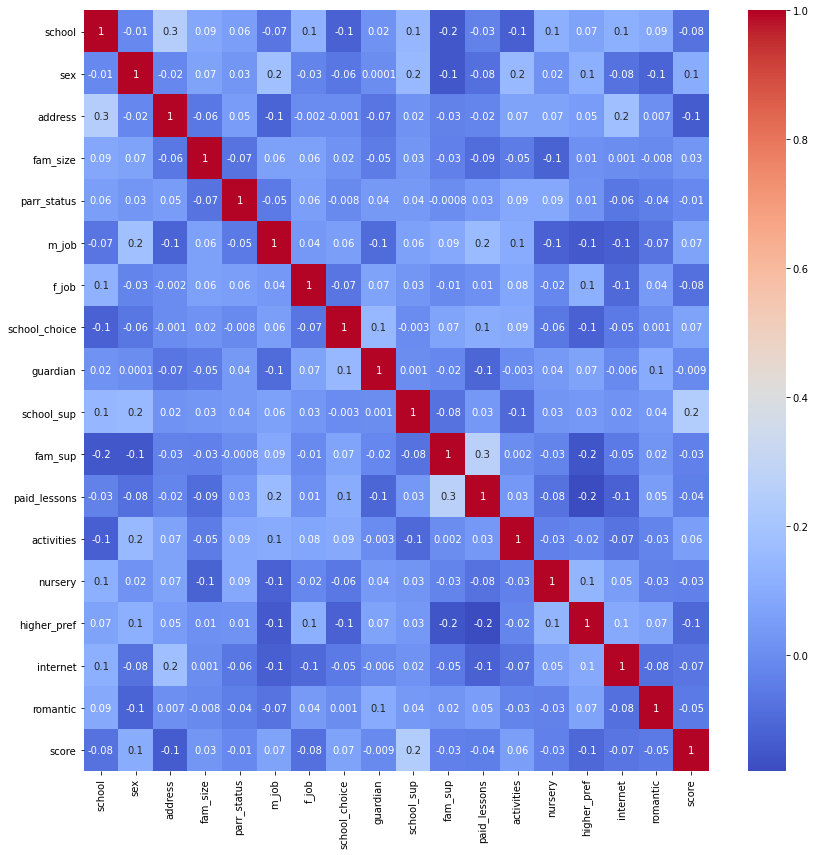

In [18]:
#let's see correlation on heatmap between the provided parameters
#we shouldn't see on the sign of the correlation (+ or -) on this plot,
#this is due to assigning numbers to values in the order they occur
plt.figure(figsize=(14,14))
sns.heatmap(math_other.corr(), cmap= 'coolwarm', annot = True, fmt='.1g')

From this plot we also see quite huge direct correlation between paid_lesson and fam_sup, quess it's means these families take a responsible approach to the child's learning process. Also there is a correlation between school and adress, which might mean that the GP school is in the city and the MS is probably outside of it.

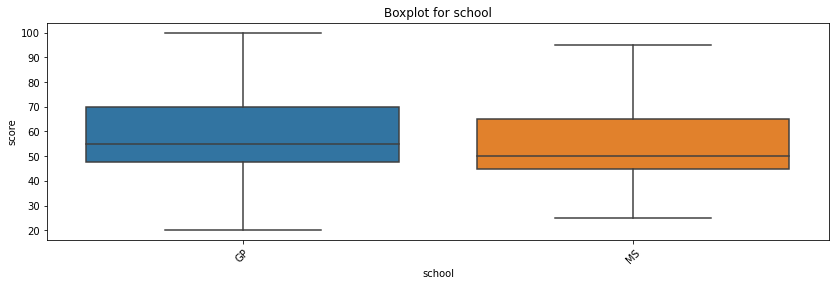

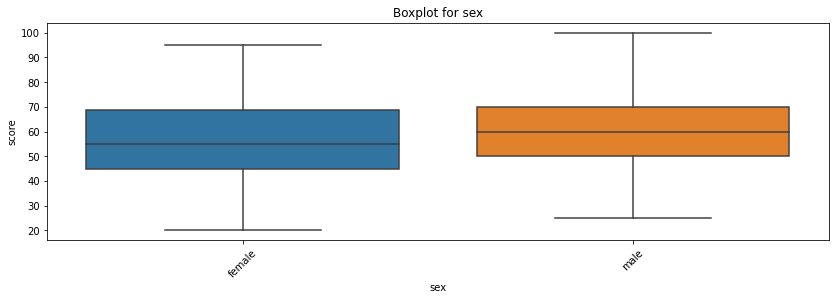

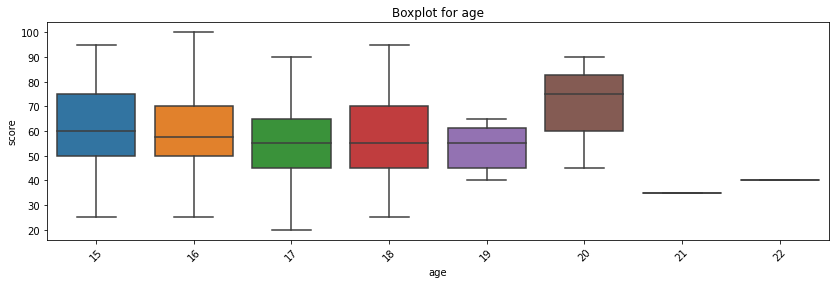

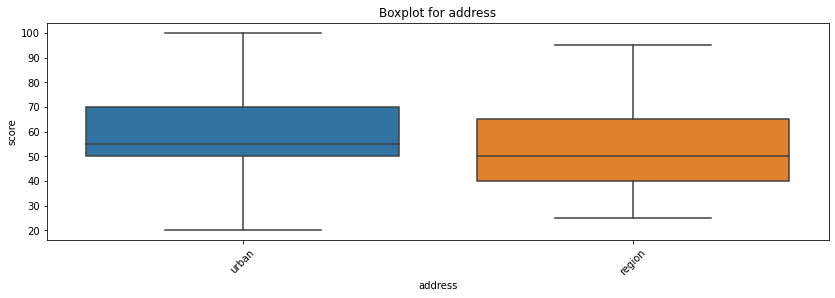

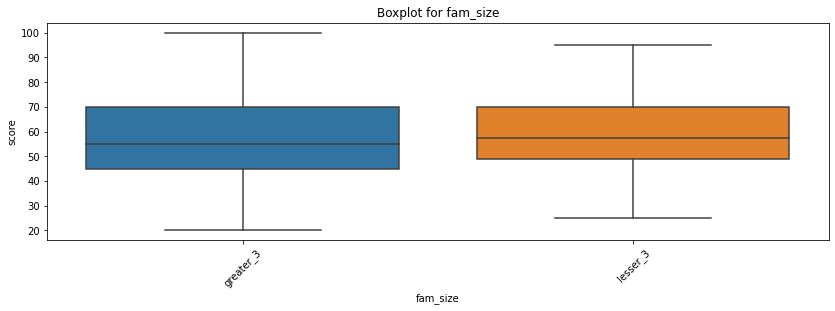

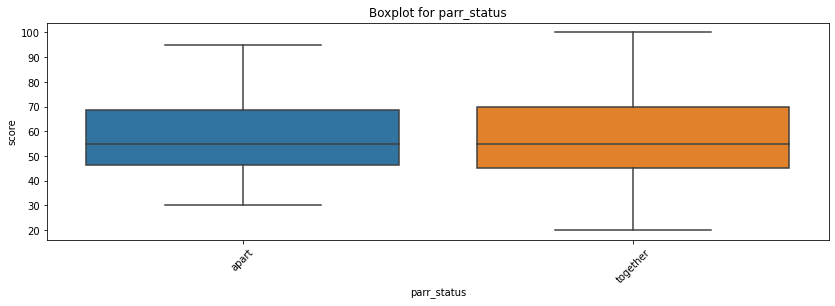

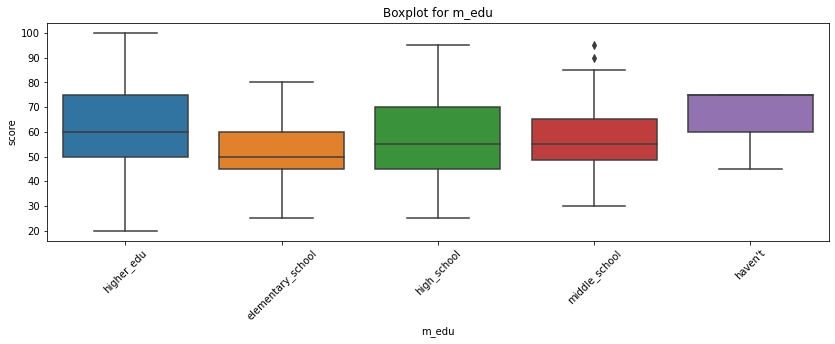

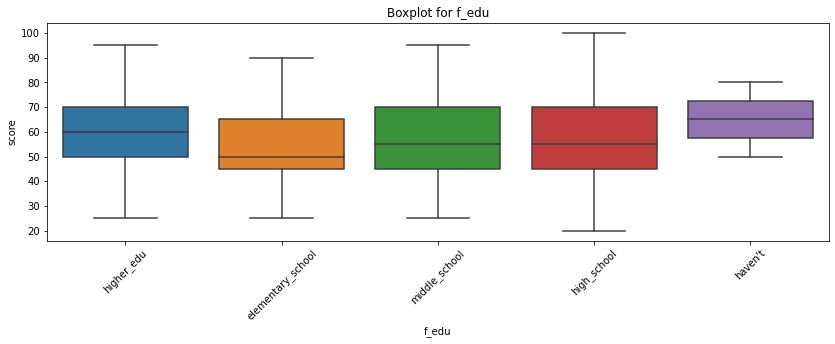

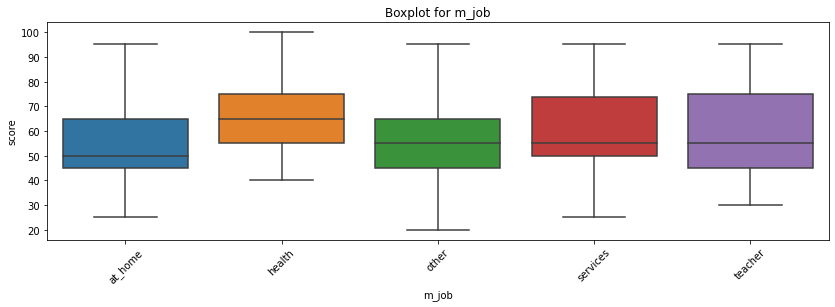

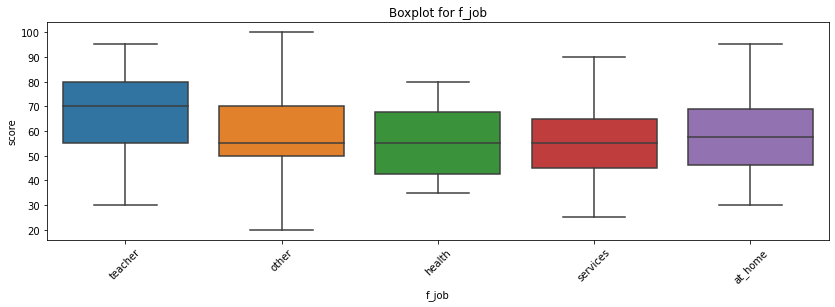

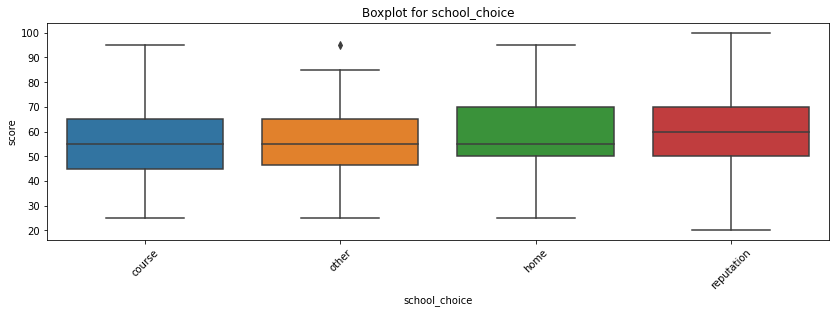

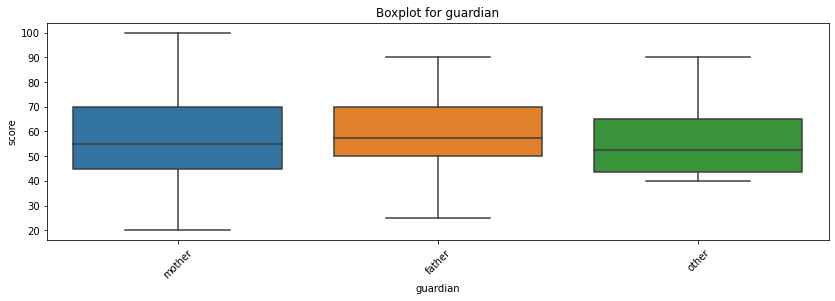

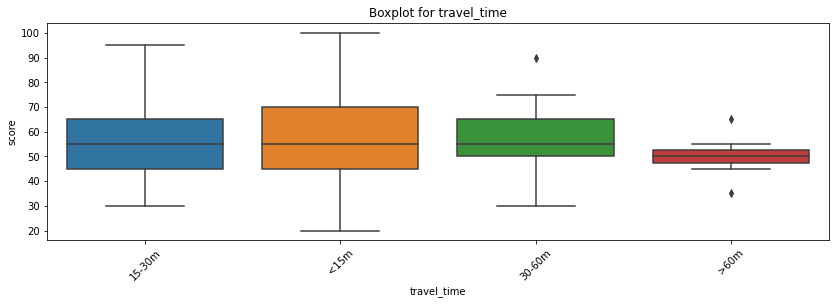

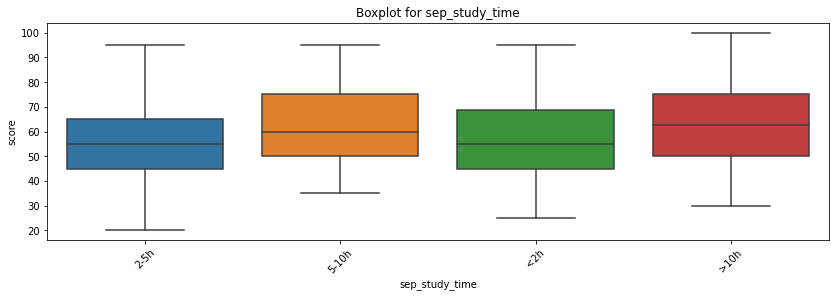

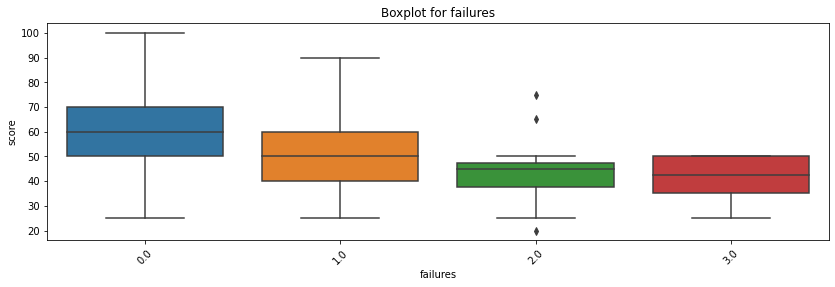

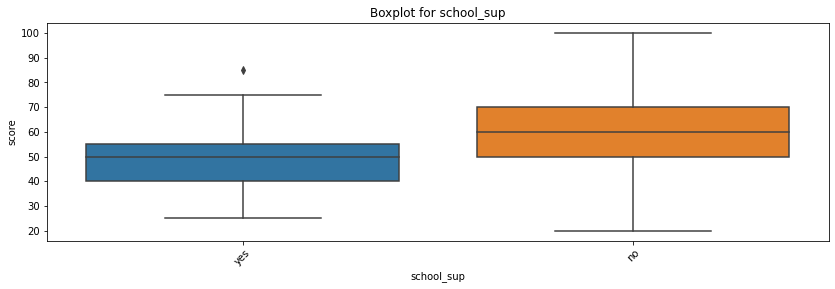

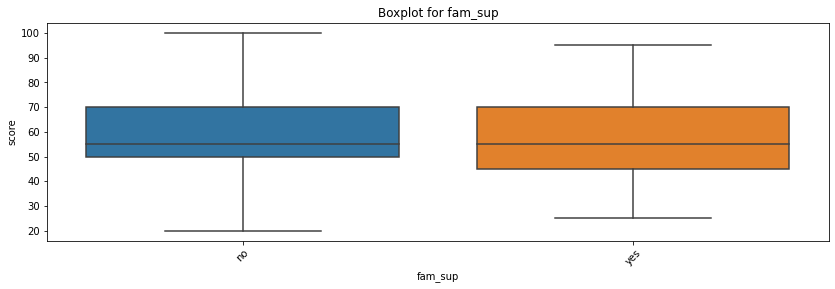

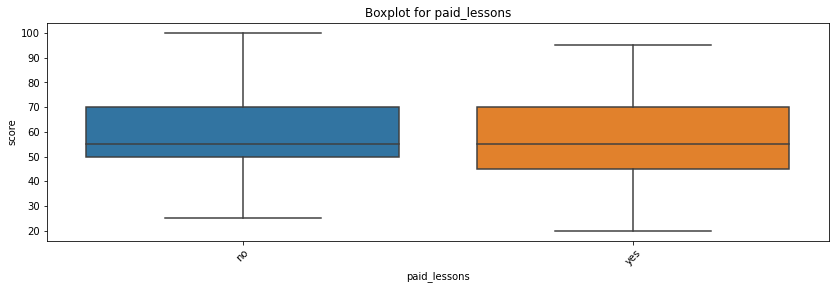

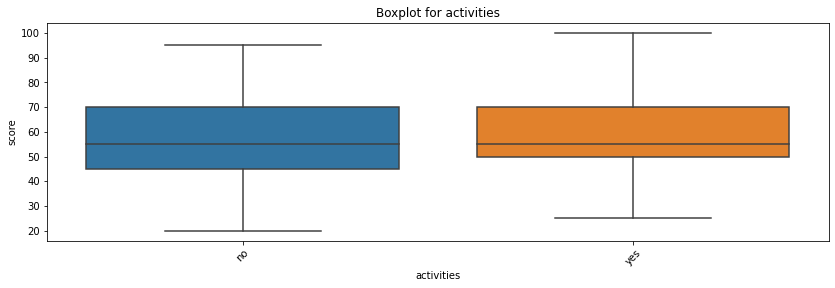

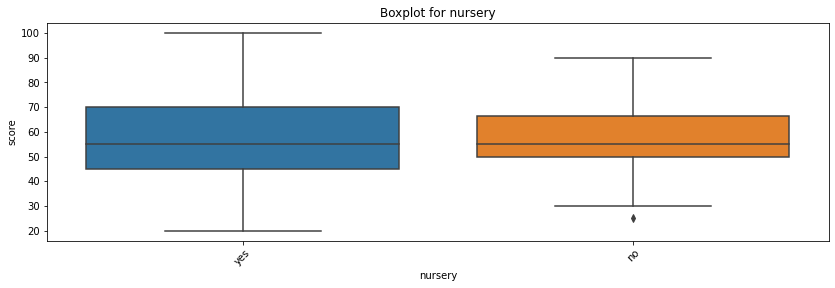

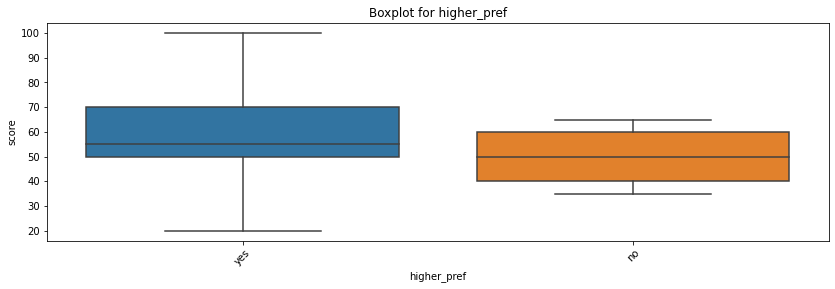

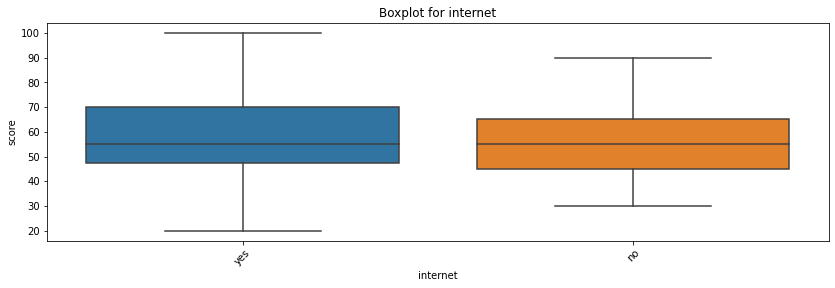

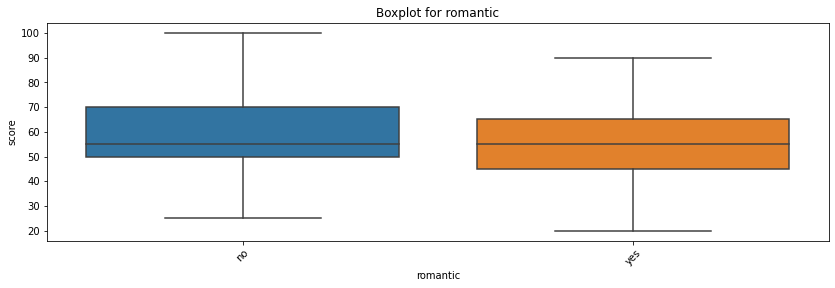

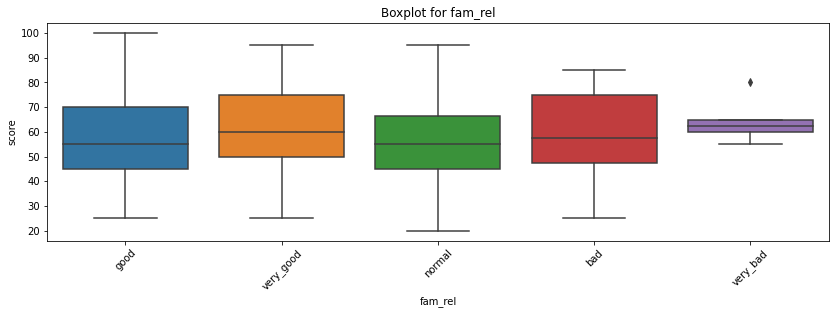

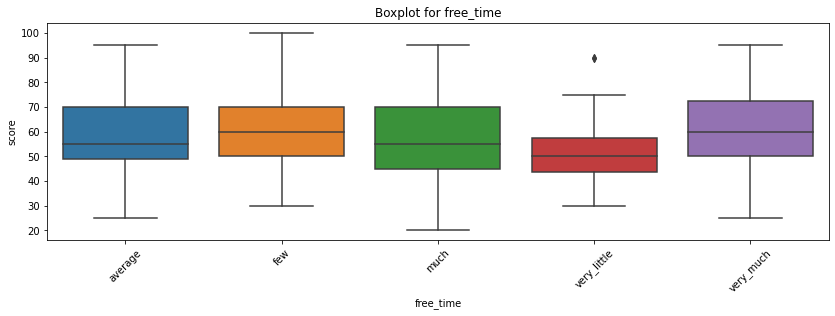

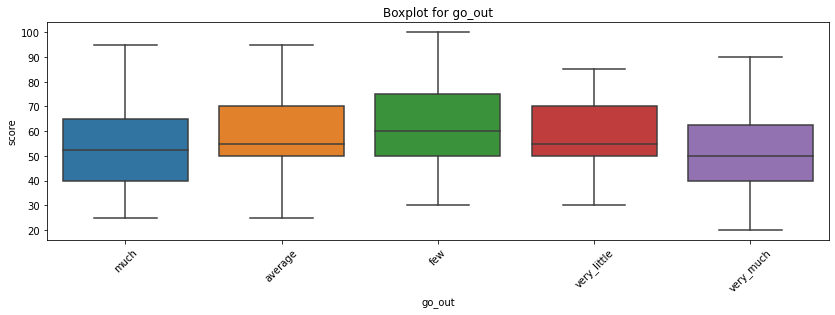

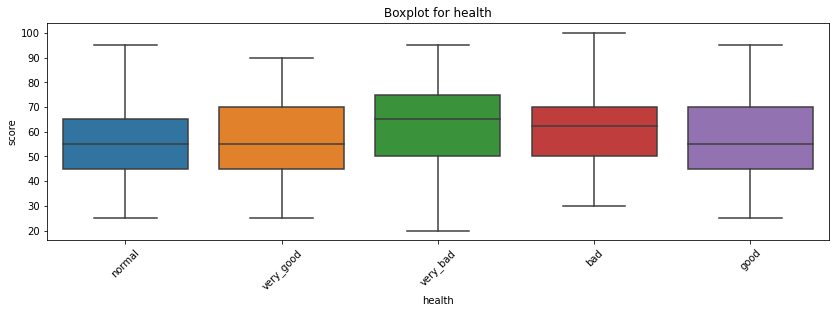

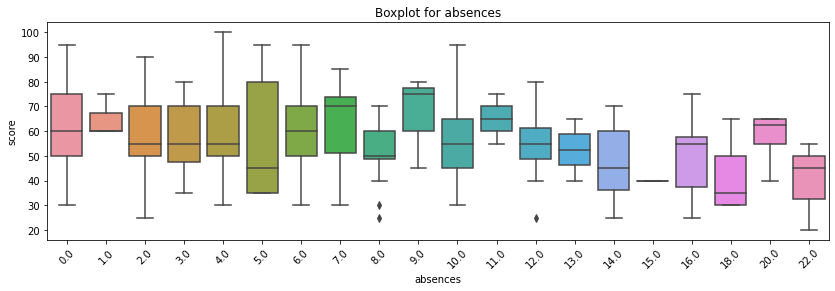

In [19]:
#let's make boxplots for our attributes
for col in ['school', 'sex', 'age', 'address', 'fam_size', 'parr_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'school_choice', 'guardian', 'travel_time', 'sep_study_time',
                     'failures', 'school_sup', 'fam_sup', 'paid_lessons', 'activities', 'nursery',
                         'higher_pref', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out',
                             'health', 'absences']:
    get_boxplot(col)

In [26]:
#find a significant correlation between the predicted parameter and the provided parameters
for col in ['school', 'sex', 'age', 'address', 'fam_size', 'parr_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'school_choice', 'guardian', 'travel_time', 'sep_study_time',
                     'failures', 'school_sup', 'fam_sup', 'paid_lessons', 'activities', 'nursery',
                         'higher_pref', 'internet', 'romantic', 'fam_rel', 'free_time', 'go_out',
                             'health', 'absences']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки f_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки f_job
Найдены статистически значимые различия для колонки sep_study_time
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки school_sup
Найдены статистически значимые различия для колонки go_out


It is particularly interesting that lack of school support correlate with higher score. I checked other vaues with ("school_sup" == "yes" option) and didn't find any intresting correlations. So my guess is that it is an underachievers and if the school didn't provide support their score would be lower.
Direct correlation of "score" and "failures" shows that self-confident students are get in common higher marks. 
The correlation between parents ' educational level and student success seems logical, although the column with no education is wrenched from it.
The math_other graph shows that more successful students live in the city, I believe that the address, in general, is a very broad parameter, which may indirectly include, for example, the convenience (and therefore time) of traveling to school for students, the availability of a stable Internet connection, and schools in the city can probably provide better education than in the region. Therefore, the "address" parameter itself is unlikely to directly affect the math score, but it is rather a collective parameter that conditionally represents the factors that are included and not included in our table. 
The correlation of the values of lessons at home with the math score is logical and shows that on average, students who spent more time at home studying passed the exam better. A similar situation is observed in the go_out column, students who did not spend much time walking generally pass the exams better.
An interesting correlation is observed between the education of the mother and father and the exam score. In the case of the father, everything seems logical, the highest score can be seen in the results of the exam of teachers ' children (and as you know, it is often men who teach mathematics at school). But the correlation with the work of the mother seemed unexpected to me, the lowest marks on the exam are given to the children of housewives, who seem to have free time to help their children, but probably, in this case, they simply do not have enough qualifications.
Also worth mentioning is a small correlation with absences. In our case, we take no more than 15 of the most frequently occurring unique values, but if we select only 10, the relationship becomes significant.

In [25]:
#we will leave only those columns that significantly correlate with the 'score' parameter
model_for_math = math.loc[:, ['address', 'm_edu', 'f_edu', 'm_job', 'f_job',
                              'sep_study_time', 'failures', 'school_sup', 'go_out', 'score']]
model_for_math.head()

,address,m_edu,f_edu,m_job,f_job,sep_study_time,failures,school_sup,go_out,score
0,urban,higher_edu,higher_edu,at_home,teacher,2-5h,0.0,yes,much,30.0
1,urban,elementary_school,elementary_school,at_home,other,2-5h,0.0,no,average,30.0
2,urban,elementary_school,elementary_school,at_home,other,2-5h,3.0,yes,few,50.0
3,urban,higher_edu,middle_school,health,other,5-10h,0.0,no,few,75.0
4,urban,high_school,high_school,other,other,2-5h,0.0,no,few,50.0
